In [16]:
import pandas as pd

In [17]:
routes = pd.read_csv("jyvaskyla_routes_2024-05-23.csv")
jyvaskyla = pd.read_csv("Jyväskylä Hannikaisenkatu 5.3.2024 - 22.5.2024_7609a33b-91f2-460f-9dc2-1f53b5f08cd0.csv")

In [18]:
import numpy as np
# Muunetaan "-" NaN arvoksi
jyvaskyla = jyvaskyla.replace('-',np.NaN)
jyvaskyla["Date"] = jyvaskyla["Vuosi"].astype(str) + "-" + jyvaskyla["Kuukausi"].astype(str) + "-" +  jyvaskyla["Päivä"].astype(str) + " " + jyvaskyla["Aika [UTC]"]
jyvaskyla["Date"] = pd.to_datetime(jyvaskyla["Date"])
jyvaskyla["Hengitettävät hiukkaset <10 µm [µg/m3]"] = jyvaskyla["Hengitettävät hiukkaset <10 µm [µg/m3]"].astype(float)
jyvaskyla["Pienhiukkaset <2.5 µm [µg/m3]"] = jyvaskyla["Pienhiukkaset <2.5 µm [µg/m3]"].astype(float)
jyvaskyla.dtypes

Havaintoasema                                     object
Vuosi                                              int64
Kuukausi                                           int64
Päivä                                              int64
Aika [UTC]                                        object
Hengitettävät hiukkaset <10 µm [µg/m3]           float64
Pienhiukkaset <2.5 µm [µg/m3]                    float64
Date                                      datetime64[ns]
dtype: object

In [19]:
import datetime
import warnings
warnings.filterwarnings('ignore')
routes["endTime"] = pd.to_datetime(routes["endTime"])
routes["startTime"] = pd.to_datetime(routes["startTime"])
duration_hours = (routes["endTime"] - routes["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(routes['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(routes['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(routes['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()
duration_by_day

endTime
2024-05-01    0.000000
2024-05-05    0.051111
2024-05-06    0.623889
2024-05-07    0.068889
2024-05-10    0.199167
2024-05-13    0.820278
2024-05-14    1.207500
2024-05-15    1.774722
2024-05-16    0.180000
2024-05-17    0.250278
dtype: float64

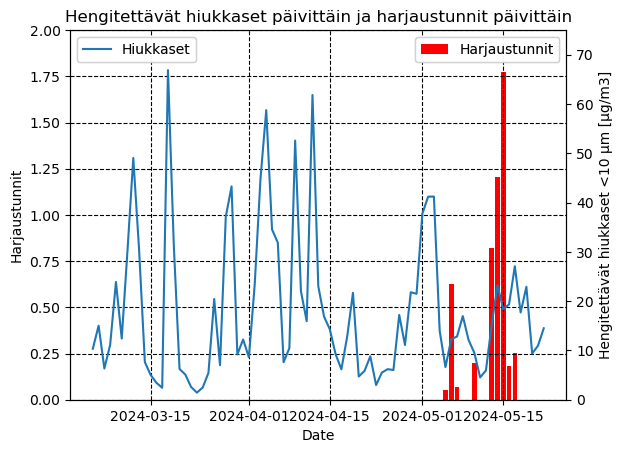

In [20]:
import matplotlib.pyplot as plt
df2 = jyvaskyla[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(duration_by_day.index, duration_by_day.values, label="Harjaustunnit", color="red")
ax2.plot(df2, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset päivittäin ja harjaustunnit päivittäin")
ax1.set_xlabel("Date")
ax1.set_ylim(top=2)
ax2.set_ylim(0,75)
plt.show()

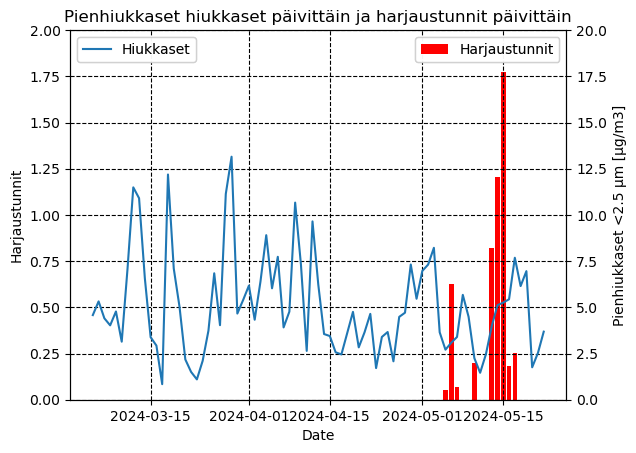

In [21]:
df3 = jyvaskyla[["Date", "Pienhiukkaset <2.5 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(duration_by_day.index, duration_by_day.values, label="Harjaustunnit", color="red")
ax2.plot(df3, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Pienhiukkaset <2.5 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Pienhiukkaset hiukkaset päivittäin ja harjaustunnit päivittäin")
ax1.set_xlabel("Date")
ax1.set_ylim(top=2)
ax2.set_ylim(0,20)
plt.show()

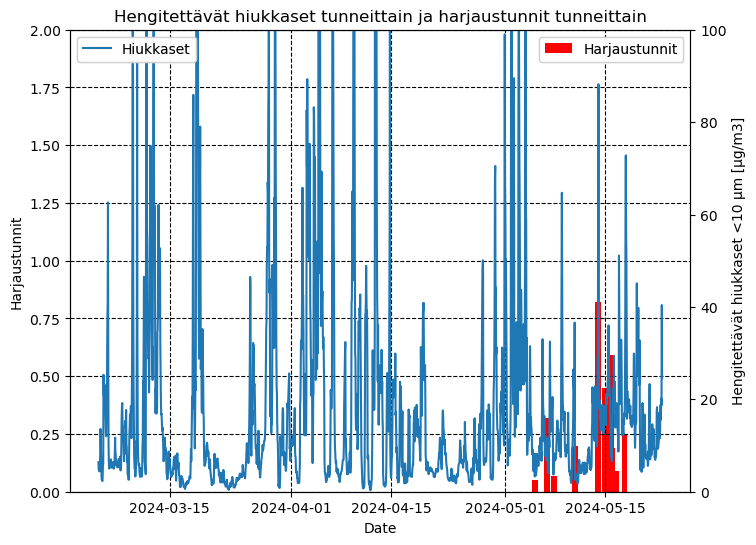

In [22]:
df4 = jyvaskyla[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='h')).mean().dropna(how='all')
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.bar(x=duration_by_hour.index, height=duration_by_hour.values, label="Harjaustunnit", color="red")
ax2.plot(df4, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset tunneittain ja harjaustunnit tunneittain")
ax1.set_xlabel("Date")
ax1.set_ylim(top=2)
ax2.set_ylim(0,100)
plt.show()

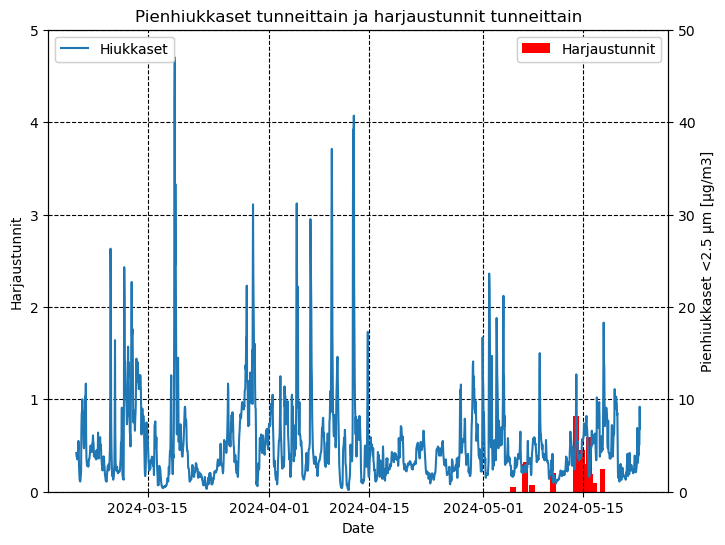

In [23]:
df5 = jyvaskyla[["Date", "Pienhiukkaset <2.5 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='h')).mean().dropna(how='all')
fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()
ax1.bar(x=duration_by_hour.index, height=duration_by_hour.values, label="Harjaustunnit", color="red")
ax2.plot(df5, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Pienhiukkaset <2.5 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Pienhiukkaset tunneittain ja harjaustunnit tunneittain")
ax1.set_xlabel("Date")
ax1.set_ylim(top=5)
ax2.set_ylim(0,50)
plt.show()

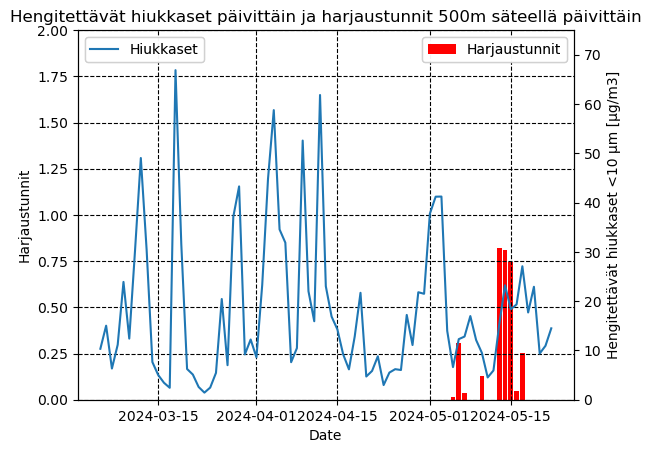

In [24]:
m500 = routes[routes["500m"] == True]


duration_hours = (m500["endTime"] - m500["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(m500['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(m500['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(m500['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()
duration_by_day

df2 = jyvaskyla[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(duration_by_day.index, duration_by_day.values, label="Harjaustunnit", color="red")
ax2.plot(df2, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset päivittäin ja harjaustunnit 500m säteellä päivittäin")
ax1.set_xlabel("Date")
ax1.set_ylim(top=2)
ax2.set_ylim(0,75)
plt.show()

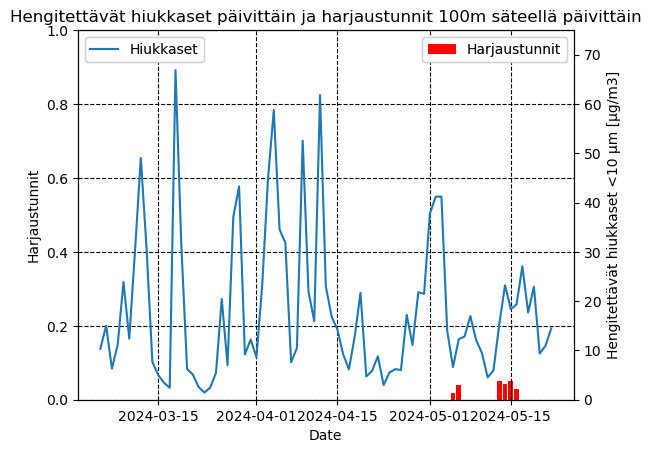

In [25]:
m100 = routes[routes["100m"] == True]


duration_hours = (m100["endTime"] - m100["startTime"]).dt.total_seconds() / 3600

duration_by_day = duration_hours.groupby(m100['endTime'].dt.to_period('d')).sum()
duration_by_hour = duration_hours.groupby(m100['endTime'].dt.to_period('h')).sum()

durations = duration_hours.groupby(m100['endTime']).sum()
duration_by_day.index = duration_by_day.index.to_timestamp()
duration_by_hour.index = duration_by_hour.index.to_timestamp()
duration_by_day

df2 = jyvaskyla[["Date", "Hengitettävät hiukkaset <10 µm [µg/m3]"]].set_index('Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(duration_by_day.index, duration_by_day.values, label="Harjaustunnit", color="red")
ax2.plot(df2, label="Hiukkaset")
legend1 = ax1.legend(loc='upper right')
legend2 = ax2.legend(loc='upper left')
ax1.add_artist(legend1)
ax2.add_artist(legend2)
ax1.grid(color="black", linestyle="dashed")
ax2.set_ylabel("Hengitettävät hiukkaset <10 µm [µg/m3]")
ax1.set_ylabel("Harjaustunnit")
plt.title("Hengitettävät hiukkaset päivittäin ja harjaustunnit 100m säteellä päivittäin")
ax1.set_xlabel("Date")
ax1.set_ylim(top=1)
ax2.set_ylim(0,75)
plt.show()